<a href="https://colab.research.google.com/github/idziksmart/data-science/blob/master/PCA_przyklady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=150)


# Breast cancer

## Wczytanie danych

In [2]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']
data[:3]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,
           8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,    0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,
           0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189],
       [  20.57  ,   17.77  ,  132.9   , 1326.    ,    0.0847,    0.0786,    0.0869,    0.0702,    0.1812,    0.0567,    0.5435,    0.7339,
           3.398 ,   74.08  ,    0.0052,    0.0131,    0.0186,    0.0134,    0.0139,    0.0035,   24.99  ,   23.41  ,  158.8   , 1956.    ,
           0.1238,    0.1866,    0.2416,    0.186 ,    0.275 ,    0.089 ],
       [  19.69  ,   21.25  ,  130.    , 1203.    ,    0.1096,    0.1599,    0.1974,    0.1279,    0.2069,    0.06  ,    0.7456,    0.7869,
           4.585 ,   94.03  ,    0.0062,    0.0401,    0.0383,    0.0206,    0.0225,    0.0046,   23.57  ,   25.53  ,  152.5   , 1709.    ,
          

In [3]:
target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
data.shape

(569, 30)

## Standaryzacja

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:3]


array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,
         1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867, -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ],
       [ 1.8298, -0.3536,  1.686 ,  1.9087, -0.827 , -0.4871, -0.0238,  0.5481,  0.0014, -0.8687,  0.4993, -0.8762,  0.2633,  0.7424, -0.6054,
        -0.6929, -0.4408,  0.2602, -0.8055, -0.0994,  1.8059, -0.3692,  1.5351,  1.8905, -0.3756, -0.4304, -0.1467,  1.0871, -0.2439,  0.2812],
       [ 1.5799,  0.4562,  1.5665,  1.5589,  0.9422,  1.0529,  1.3635,  2.0372,  0.9397, -0.398 ,  1.2287, -0.7801,  0.8509,  1.1813, -0.297 ,
         0.815 ,  0.2131,  1.4248,  0.237 ,  0.2936,  1.5119, -0.024 ,  1.3475,  1.4563,  0.5274,  1.0829,  0.855 ,  1.955 ,  1.1523,  0.2014]])

## PCA - 2 komponenty

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [8]:
pca_2 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'class': target})
pca_2.replace(0, 'Benign', inplace=True)
pca_2.replace(1, 'Malignant', inplace=True)
pca_2.head()

pca_1      pca_2   class
0  9.192837   1.948583  Benign
1  2.387802  -3.768172  Benign
2  5.733896  -1.075174  Benign
3  7.122953  10.275589  Benign
4  3.935302  -1.948072  Benign

In [9]:
# skumulowa wyjasniona wariancja
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                  0.442720    0.442720          1
1                  0.189712    0.632432          2

In [10]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950, template='plotly_dark'))
fig.show()

In [11]:
# a zaczynalismy z wymiaru R30 ;)
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')

## PCA - 3 komponenty

In [12]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898]])

In [13]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'pca_3': data_pca[:, 2], 'class': target})
pca_3.replace(0, 'Benign', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()


pca_1      pca_2     pca_3   class
0  9.192837   1.948583 -1.123167  Benign
1  2.387802  -3.768172 -0.529292  Benign
2  5.733896  -1.075174 -0.551748  Benign
3  7.122953  10.275589 -3.232789  Benign
4  3.935302  -1.948072  1.389768  Benign

In [14]:
# ta skumulowana wariancja kumuluje sie wraz ze wzrostem wielkosci wymiaru
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                  0.442720    0.442720          1
1                  0.189712    0.632432          2
2                  0.093932    0.726364          3

In [16]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [17]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class',
              opacity=0.7, size_max=10, width=950, template='plotly_dark')

# Zbiór danych MNIST


In [18]:
# keras - wysokopoziomowe budowanie sieci neuronowych
# zdjecia 28x28 - recznie napisane cyfry, czarnobiale
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Obcięcie danych do pierwszych 5000 zdjęć

In [ ]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [19]:
# natężenie wartosci konkretnego piksela
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [20]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Wizualizacja danych

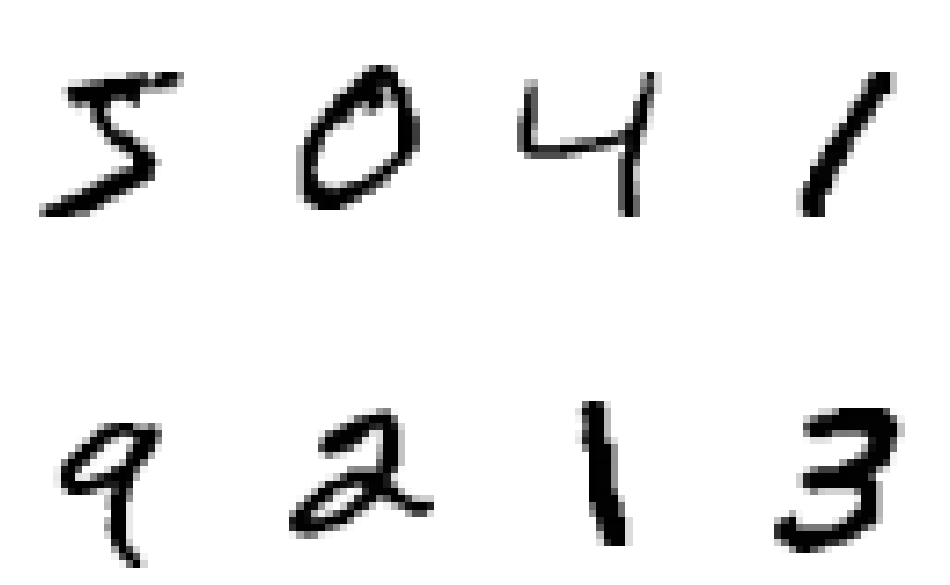

In [21]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

## Standaryzacja

In [22]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(60000, 28, 28)

## Wypłaszczenie obrazów

In [23]:
# 784 (28x28) zmiennych opisujacych jedno zdjecie
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(60000, 784)

## PCA - 3 komponenty

In [24]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.486 , -1.2262, -0.0962],
       [ 3.9675, -1.1563,  2.3386],
       [-0.2033,  1.538 , -0.7392],
       [-3.1338, -2.3811,  1.0732],
       [-1.501 ,  2.8649,  0.0641]])

## Wyjaśniona wariancja

In [25]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results
# 0.23 kumulacja to nie jest duzo

explained_variance_ratio  cumulative  component
0                  0.097047    0.097047          1
1                  0.070959    0.168006          2
2                  0.061691    0.229697          3

In [26]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

In [27]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

pca_1     pca_2     pca_3 class
0  0.486014 -1.226238 -0.096213   5.0
1  3.967530 -1.156326  2.338597   0.0
2 -0.203331  1.537966 -0.739206   4.0
3 -3.133834 -2.381128  1.073177   1.0
4 -1.500997  2.864850  0.064116   9.0

## Wizualizacja 3D głównych komponentów

In [28]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              symbol='class', opacity=0.7, size_max=10, width=950, height=700,
              template='plotly_dark', title='PCA - MNIST dataset')

In [29]:
# procent calkowitej wyjasnionej wariancji zamiast liczby komponentow, wazne by bylo typu float, trzeba dopasowac tak pca by yjasnialo 95 procent rozrzutu naszych danych
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.486 , -1.2262, -0.0961, -2.1794, -0.107 , -0.9117,  0.9176,  0.6267, -1.4255,  0.7781,  0.7745, -0.9963, -0.4451,  2.9384,  0.8598,
        -0.0184,  1.2947,  1.2124,  1.0886,  0.6523,  0.108 , -0.2524, -0.8517,  0.9814,  0.181 ,  0.3935, -1.2079,  0.6671, -0.4922, -0.4839,
        -0.3841,  0.1356,  0.4215,  0.3318, -0.5977,  0.7875,  0.2558,  0.7852,  0.6183, -1.4108,  0.7278,  0.6057, -0.1578, -0.3332, -0.4858,
         0.0278,  0.5002, -0.2998,  0.1339,  0.0784,  0.5108, -0.4296, -0.4642,  0.3435,  0.0122, -0.6435, -0.4607, -0.2383, -0.5874,  0.4934,
         0.2622, -0.0207, -0.319 ,  0.3281,  0.7052,  0.4743,  0.7489,  0.0987,  0.2301,  0.0589,  0.3601, -0.6037, -0.2185, -0.0347, -0.4165,
         0.2906,  0.2473, -0.1726, -0.1461, -0.1648,  0.3607,  0.1539, -0.1078,  0.1791, -0.1088,  0.012 , -0.5797, -0.182 , -0.1299, -0.114 ,
         0.0745, -0.1268,  0.1874, -0.3163,  0.053 ,  0.2225,  0.1974, -0.086 ,  0.1432, -0.4997,  0.5156,  0.1465, -0.0636, -0.3343, -0.1111,

In [30]:
pca.n_components_

154

## Wyjaśniona wariancja

In [31]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                    0.097047    0.097047          1
1                    0.070959    0.168006          2
2                    0.061691    0.229697          3
3                    0.053894    0.283591          4
4                    0.048688    0.332279          5
..                        ...         ...        ...
149                  0.000468    0.948356        150
150                  0.000467    0.948823        151
151                  0.000463    0.949286        152
152                  0.000459    0.949746        153
153                  0.000450    0.950196        154

[154 rows x 3 columns]

In [32]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

# Zbiór danych Cifar

In [33]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
# zdjecia kolorowe 32x32

170498071/170498071 [==============================] - 5s 0us/step
X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


Obcięcie do pierwszych 5000 obrazów

In [34]:
X_train = X_train[:5000]
y_train = y_train[:5000]
X_train[0].shape

(32, 32, 3)

In [35]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Wizualizacja

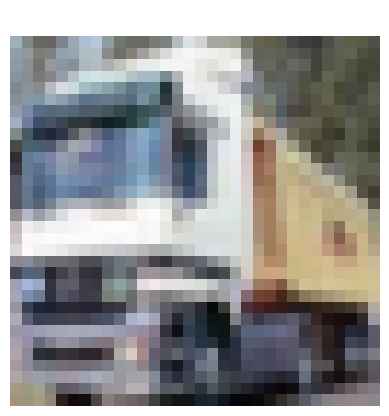

In [36]:
targets = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
           5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

plt.imshow(X_train[1])
plt.title(targets[y_train[1][0]], color='white', fontsize=17)
plt.axis('off')
plt.show()

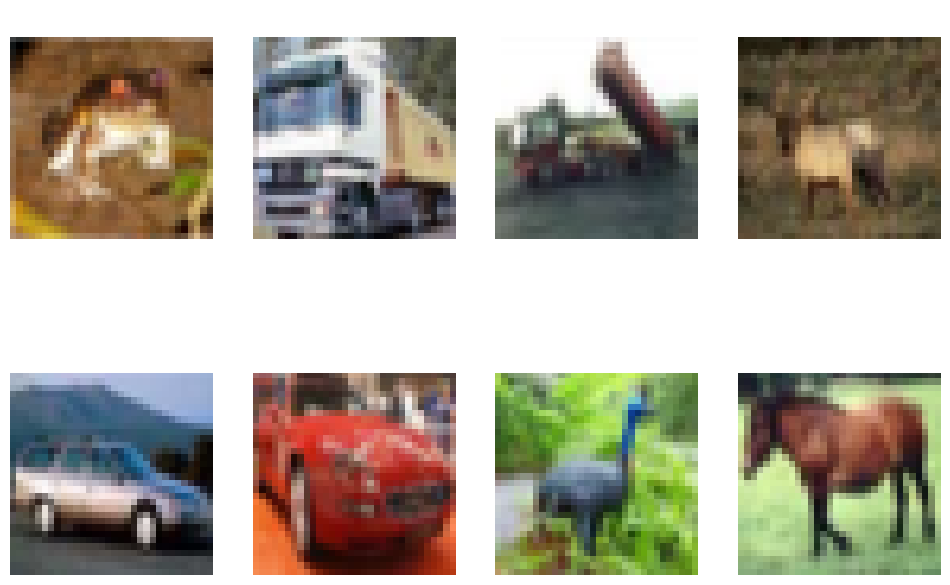

In [37]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i])
    plt.title(targets[y_train[i][0]], color='white', fontsize=17)
    plt.axis('off')
plt.show()

## Standaryzacja

In [38]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(5000, 32, 32, 3)

## Wypłaszczenie obrazów

In [39]:
X_train = X_train.reshape(-1, 32 * 32 * 3)
X_train.shape

(5000, 3072)

In [40]:
X_train[:5]

array([[0.2314, 0.2431, 0.2471, ..., 0.4824, 0.3608, 0.2824],
       [0.6039, 0.6941, 0.7333, ..., 0.5608, 0.5216, 0.5647],
       [1.    , 1.    , 1.    , ..., 0.3137, 0.3373, 0.3294],
       [0.1098, 0.098 , 0.0392, ..., 0.2824, 0.2549, 0.1804],
       [0.6667, 0.7059, 0.7765, ..., 0.2863, 0.302 , 0.3137]])

## PCA - 3 komponenty

In [41]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.5023,   2.5505,   1.5772],
       [  0.8709,  -0.8715,   6.2163],
       [  8.111 , -11.1948,  -2.6912],
       [-10.3522,  -0.2394,   1.2522],
       [ -2.4619,  -4.8347,   1.2479]])

## Wyjaśniona wariancja

In [42]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                  0.291944    0.291944          1
1                  0.112451    0.404395          2
2                  0.066359    0.470754          3

In [43]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [44]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

pca_1      pca_2     pca_3 class        name
0  -6.502318   2.550480  1.577220   6.0        frog
1   0.870890  -0.871500  6.216323   9.0       truck
2   8.111013 -11.194790 -2.691175   9.0       truck
3 -10.352160  -0.239424  1.252194   4.0        deer
4  -2.461939  -4.834697  1.247875   1.0  automobile

## Wizualizacja 3D głównych komponentów

In [45]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name',
              symbol='name', opacity=0.7, size_max=10, width=950, height=700,
              title='PCA - CIFAR dataset', template='plotly_dark')

PCA - 0.95% wariancji

In [46]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.5023,   2.5505,   1.5772, ...,  -0.2103,   0.0938,  -0.029 ],
       [  0.8709,  -0.8715,   6.2163, ...,  -0.3181,   0.2744,  -0.6623],
       [  8.111 , -11.1948,  -2.6912, ...,  -0.2744,   0.2524,   0.0605],
       [-10.3522,  -0.2394,   1.2522, ...,   0.0044,   0.0575,   0.0231],
       [ -2.4619,  -4.8347,   1.2479, ...,   0.0938,   0.23  ,  -0.0335]])

In [47]:
pca.n_components_

203

In [48]:
pca.explained_variance_ratio_

array([0.2919, 0.1125, 0.0664, 0.0371, 0.0354, 0.0288, 0.0265, 0.0219, 0.0211, 0.0145, 0.0135, 0.0105, 0.0105, 0.0101, 0.0091, 0.0085, 0.0075,
       0.0071, 0.0067, 0.0066, 0.0062, 0.0058, 0.0051, 0.0049, 0.0048, 0.0047, 0.0046, 0.0045, 0.0041, 0.004 , 0.0037, 0.0034, 0.0032, 0.0032,
       0.0031, 0.003 , 0.0027, 0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0023, 0.0022, 0.0021, 0.0021, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018,
       0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0014, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013,
       0.0012, 0.0012, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0007, 0.0007,
       0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006,

## Wariancja wyjaśniona

In [49]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()


explained_variance_ratio  cumulative  component
0                  0.291944    0.291944          1
1                  0.112451    0.404395          2
2                  0.066359    0.470754          3
3                  0.037136    0.507891          4
4                  0.035443    0.543334          5

In [50]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()